In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
def calculate_iqr(data):
    if not data:
        raise ValueError("Data list cannot be empty")
    data = np.array(data)
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return IQR, lower_bound, upper_bound, outliers, Q1, Q2, Q3

In [36]:
def remove_outliers(data, lower_bound, upper_bound):
    return [x for x in data if lower_bound <= x <= upper_bound]

In [37]:
df = [-1,-2,-3,-1,-14,0,1,2,5,6,8,7,4,3,2,15]

In [38]:
data, Q1, Q2, Q3, IQR, lower_bound, upper_bound, outliers = calculate_IQR(df)

In [39]:
print(f'Data: {data}')
print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'lower bound: {lower_bound}')
print(f'upper bound: {upper_bound}')
print(f'outliers: {outliers}')

Data: [ -1  -2  -3  -1 -14   0   1   2   5   6   8   7   4   3   2  15]
Q1: -1.0
Q2: 2.0
Q3: 5.25
IQR: 6.25
lower bound: -10.375
upper bound: 14.625
outliers: [-14, 15]


In [40]:
cleaned_data = remove_outliers(data, lower_bound, upper_bound)

In [41]:
cleaned_data = remove_outliers(data, lower_bound, upper_bound)

In [42]:
cleaned_data

[-1, -2, -3, -1, 0, 1, 2, 5, 6, 8, 7, 4, 3, 2]

In [53]:
not_outliers = {'Data': data, 'Type': 'not Outliers'}
outliers = {'Data': outliers, 'Type': ' Outliers'}

In [57]:
not_outliers = pd.DataFrame(not_outliers)
outliers = pd.DataFrame(outliers)

In [58]:
outliers

,Data,Type
0,-14,Outliers
1,15,Outliers


In [59]:
df = pd.concat([not_outliers, outliers], ignore_index=True)

In [60]:
df

,Data,Type
0,-1,not Outliers
1,-2,not Outliers
2,-3,not Outliers
3,-1,not Outliers
4,-14,not Outliers
5,0,not Outliers
6,1,not Outliers
7,2,not Outliers
8,5,not Outliers
9,6,not Outliers


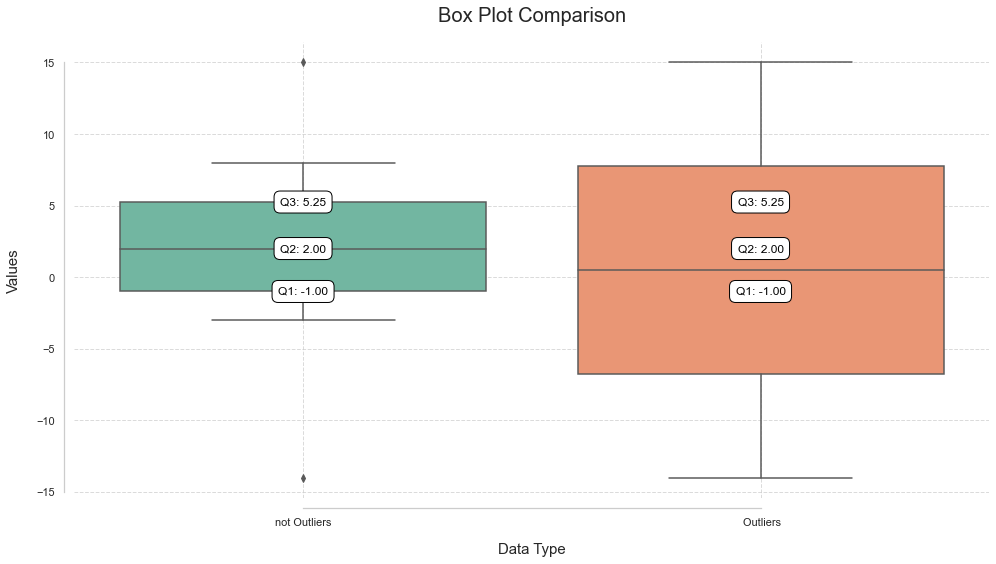

In [61]:

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

ax = sns.boxplot(x='Type', y='Data', data=df, palette=palette)

ax.set_title('Box Plot Comparison', fontsize=20, pad=20)
ax.set_xlabel('Data Type', fontsize=15, labelpad=15)
ax.set_ylabel('Values', fontsize=15, labelpad=15)

for i, type_label in enumerate(['With Outliers', 'Without Outliers']):
    y = [Q1, Q2, Q3]
    for j, value in enumerate(y):
        ax.text(i, value, f'Q{j+1}: {value:.2f}', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=12,
                color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

sns.despine(offset=10, trim=True)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The interquartile range (IQR) is: 6.25
The lower bound for outliers is: -10.375
The upper bound for outliers is: 14.625
The outliers are: [-14, 15]


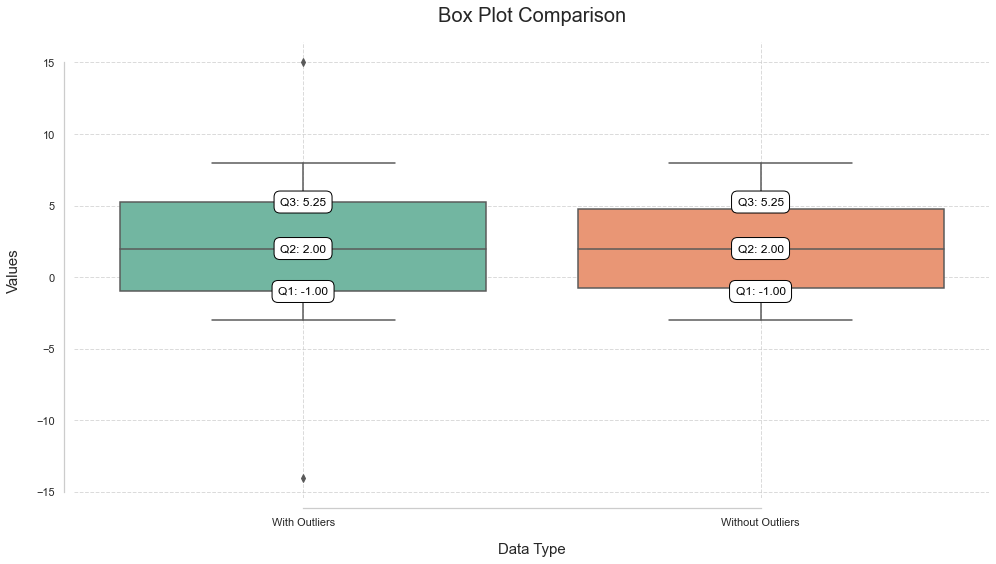

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd





# Example data
data = [-1,-2,-3,-1,-14,0,1,2,5,6,8,7,4,3,2,15]

# Calculate IQR and identify outliers
iqr, lower_bound, upper_bound, outliers, Q1, median, Q3 = calculate_iqr(data)
print("The interquartile range (IQR) is:", iqr)
print("The lower bound for outliers is:", lower_bound)
print("The upper bound for outliers is:", upper_bound)
print("The outliers are:", outliers)

# Remove outliers from the dataset
cleaned_data = remove_outliers(data, lower_bound, upper_bound)

# Prepare data for plotting
data_with_outliers = {'Data': data, 'Type': 'With Outliers'}
data_without_outliers = {'Data': cleaned_data, 'Type': 'Without Outliers'}

df_with_outliers = pd.DataFrame(data_with_outliers)
df_without_outliers = pd.DataFrame(data_without_outliers)
df = pd.concat([df_with_outliers, df_without_outliers], ignore_index=True)

# Plot box plots
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

ax = sns.boxplot(x='Type', y='Data', data=df, palette=palette)

# Add titles and labels
ax.set_title('Box Plot Comparison', fontsize=20, pad=20)
ax.set_xlabel('Data Type', fontsize=15, labelpad=15)
ax.set_ylabel('Values', fontsize=15, labelpad=15)

# Annotate Q1, Q2, Q3
for i, type_label in enumerate(['With Outliers', 'Without Outliers']):
    y = [Q1, median, Q3]
    for j, value in enumerate(y):
        ax.text(i, value, f'Q{j+1}: {value:.2f}', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=12,
                color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Customize the appearance
sns.despine(offset=10, trim=True)
ax.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
